In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.ensemble as ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from lib_fun import *
from skimage.feature import hog
from skimage import feature
from skimage import measure

X shape: (4559, 20, 20, 3), Y shape: (4559,)
X shape: (4559, 50, 50, 3), Y shape: (4559,)
X shape: (4559, 100, 100, 3), Y shape: (4559,)


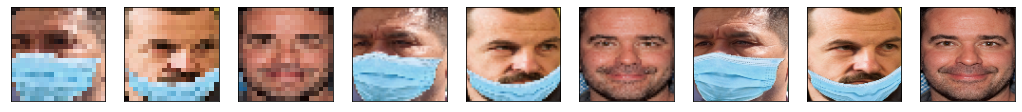

In [2]:
# Load the original face mask data with pixel of 20*20, 50*50 and 100*100
# We visulaize these image of Correct, Incorrect and No mask with each resolution.
data20, labels20 = load('../Data/Pixel20/')
data50, labels50 = load('../Data/Pixel50/')
data100, labels100 = load('../Data/Pixel100/')
VisualizeRGB(data20, data50, data100)

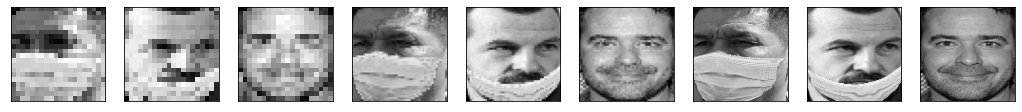

In [3]:
# Transfer the RGB image to gray image
data20_gray = RGBtoGray(data20)
data50_gray = RGBtoGray(data50)
data100_gray = RGBtoGray(data100)
VisualizeGray(data20_gray, data50_gray, data100_gray)

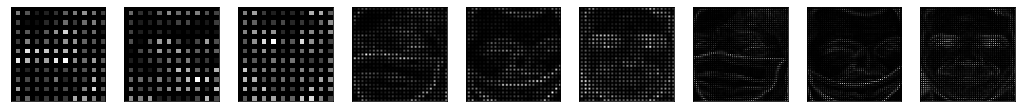

In [4]:
# Using Histogram of Oriented Gradients to extract features from RGB image
# Compute 8 direction in each 2*2 pixel
data20_hog = RGBtoHOG(data20)
data50_hog = RGBtoHOG(data50)
data100_hog = RGBtoHOG(data100)
VisualizeGray(data20_hog, data50_hog, data100_hog)

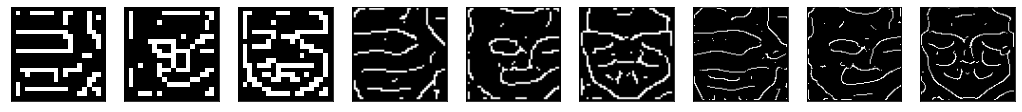

In [7]:
# Using Canny edge detector to extract features from gray image
data20_edge = GRAYtoEDGE(data20_gray, sigma=1)
data50_edge = GRAYtoEDGE(data50_gray, sigma=3)
data100_edge = GRAYtoEDGE(data100_gray, sigma=5)
VisualizeGray(data20_edge, data50_edge, data100_edge)

In [10]:
# Training process using different model.
# Flatten the image as the input data of model
def train_model(model, data, labels):
    x = Flatten(data) 
    x_train, x_test , y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=1)
    clf = make_pipeline( StandardScaler(), model)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print('accuracy: ', metrics.accuracy_score(y_test, pred)) 
    confusion = metrics.confusion_matrix(y_test, pred)
    # print('confusion matrix:')
    # print(confusion)
    # plot_confusion(confusion)
    return confusion

accuracy:  0.8859649122807017
accuracy:  0.8914473684210527
accuracy:  0.8903508771929824


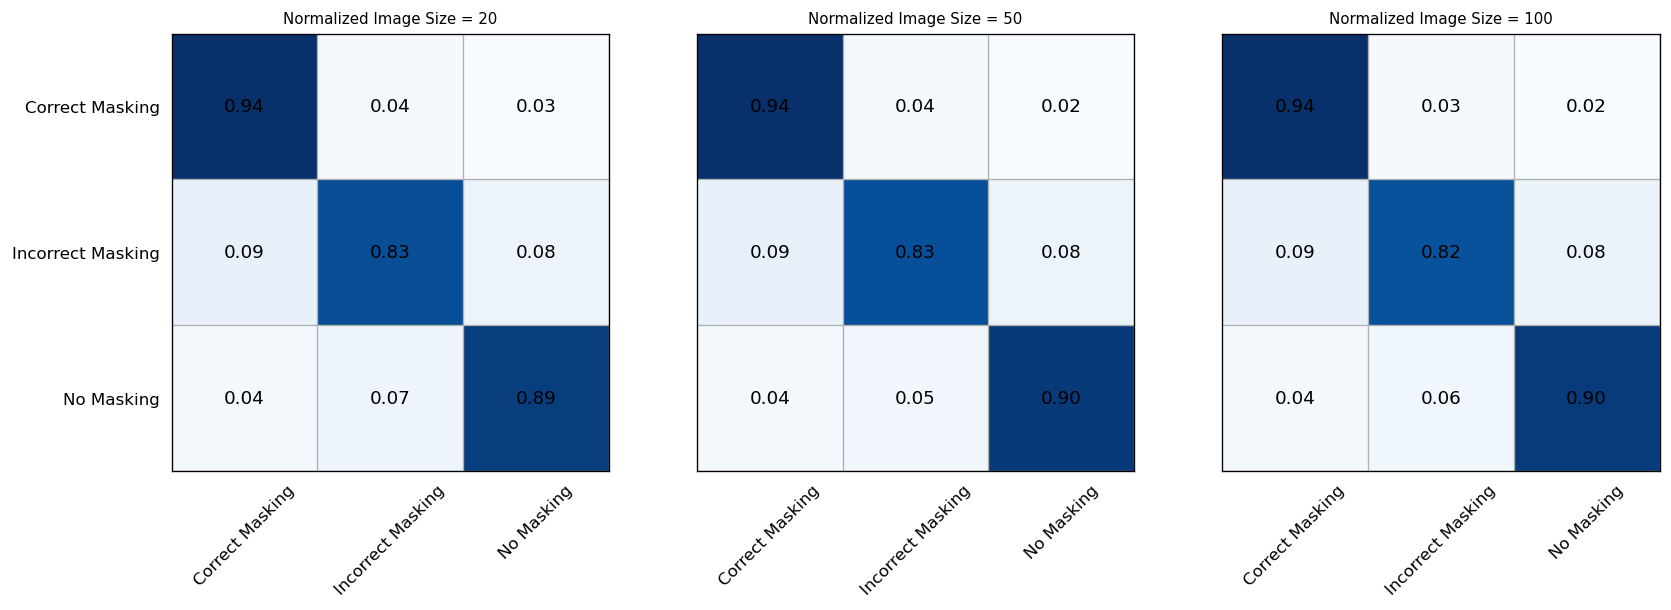

In [11]:
# SVM
confusion20 = train_model(svm.SVC(cache_size=4000), data20_gray, labels20)
confusion50 = train_model(svm.SVC(cache_size=4000), data50_gray, labels50)
confusion100 = train_model(svm.SVC(cache_size=4000), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.8037280701754386
accuracy:  0.8135964912280702
accuracy:  0.7927631578947368


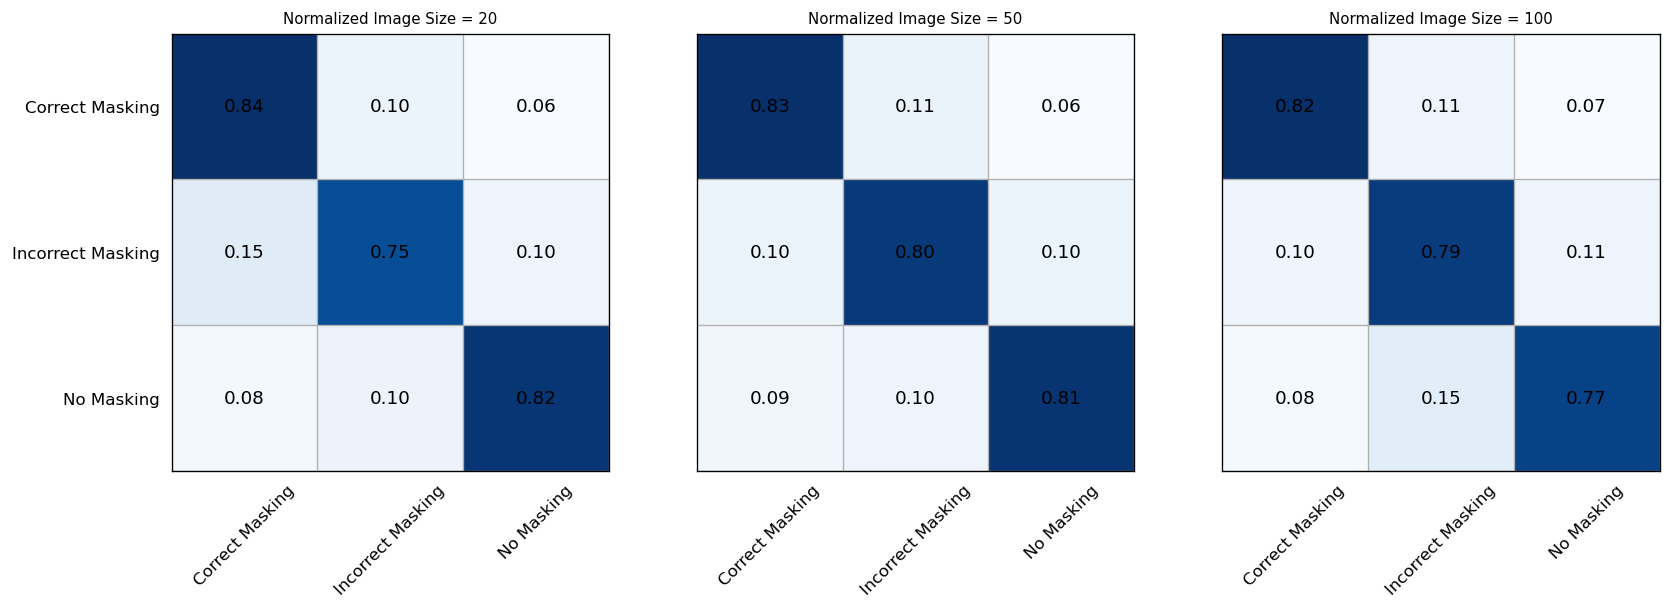

In [12]:
# Decision Tree
confusion20 = train_model(tree.DecisionTreeClassifier(), data20_gray, labels20)
confusion50 = train_model(tree.DecisionTreeClassifier(), data50_gray, labels50)
confusion100 = train_model(tree.DecisionTreeClassifier(), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])

accuracy:  0.9013157894736842
accuracy:  0.9046052631578947
accuracy:  0.9035087719298246


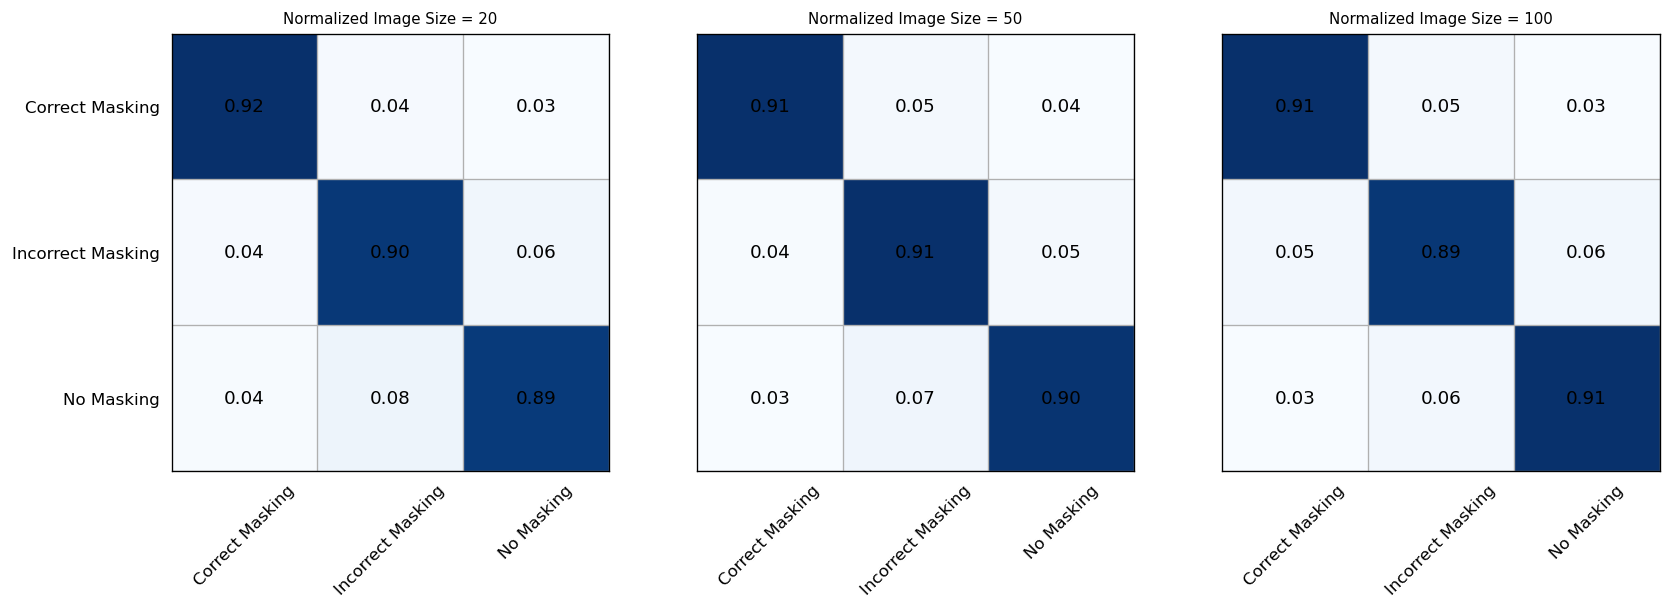

In [13]:
# Random Forest
confusion20 = train_model(ensemble.RandomForestClassifier(), data20_gray, labels20)
confusion50 = train_model(ensemble.RandomForestClassifier(), data50_gray, labels50)
confusion100 = train_model(ensemble.RandomForestClassifier(), data100_gray, labels100)
plot_confusion_matrix([confusion20, confusion50, confusion100])